# Covid 19 Severity Model with Logistic Regression & Random Forest Classifier 

## Importing all the required libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Covid Dataset.csv")
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
df.isnull().sum() # No null values in the dataset

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [4]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [5]:
# Dropping cols masks and sanitization as the attribute domain has only value 
df.drop(["Wearing Masks","Sanitization from Market"], axis =1, inplace = True)

## Feature Transformation

In [6]:
# Categorical Features -> Numerical Data
l = LabelEncoder()
df['Breathing Problem'] = l.fit_transform(df['Breathing Problem'])
df['Fever'] = l.fit_transform(df['Fever'])
df['Dry Cough'] = l.fit_transform(df['Dry Cough'])
df['Sore throat'] = l.fit_transform(df['Sore throat'])
df['Running Nose'] = l.fit_transform(df['Running Nose'])
df['Asthma'] = l.fit_transform(df['Asthma'])
df['Chronic Lung Disease'] = l.fit_transform(df['Chronic Lung Disease'])
df['Headache'] = l.fit_transform(df['Headache'])
df['Heart Disease'] = l.fit_transform(df['Heart Disease'])
df['Diabetes'] = l.fit_transform(df['Diabetes'])
df['Hyper Tension']=l.fit_transform(df['Hyper Tension'])
df['Fatigue '] = l.fit_transform(df['Fatigue '])
df['Gastrointestinal '] = l.fit_transform(df['Gastrointestinal '])
df['Abroad travel'] = l.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient'] = l.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering'] = l.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places'] = l.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places'] = l.fit_transform(df['Family working in Public Exposed Places'])
df['COVID-19'] = l.fit_transform(df['COVID-19'])

In [7]:
# New Table :
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


## Plotting the values using a heat map

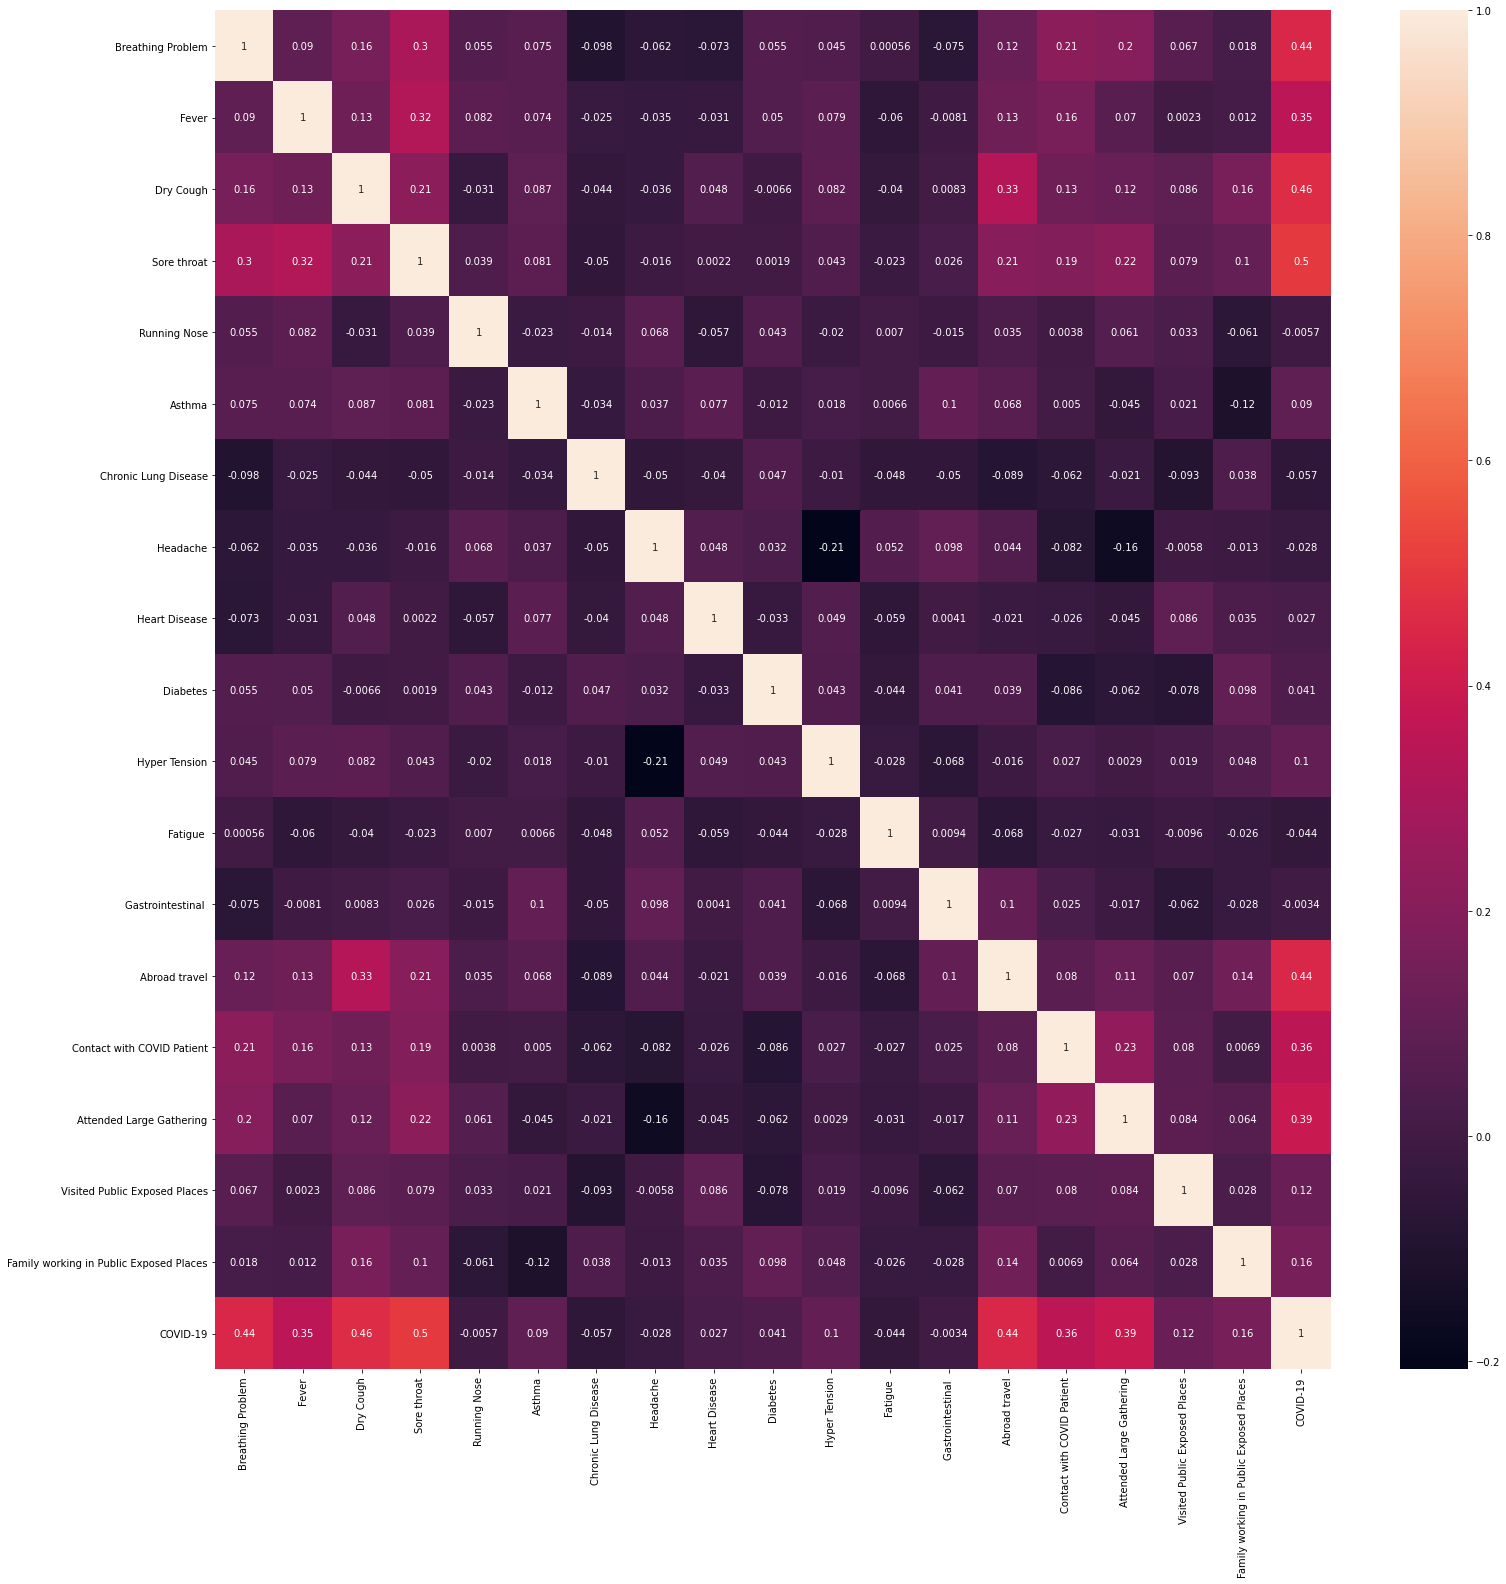

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

## The ML Modelling:

### Defining x and y from data set:

In [9]:
x = df.drop('COVID-19',axis=1) 
y = df['COVID-19']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

### Logistic Regression :

In [10]:
# Fitting the model and training it:
LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

LogisticRegression()

In [11]:
# Making Predicitons 
y_pred = LRmodel.predict(x_test)
print("Accuracy Score using LR model is: ", accuracy_score(y_test,y_pred), "\n\n")
print("Confusion matrix using LR model is :\n\n ", confusion_matrix(y_test,y_pred),"\n\n")
print("Classification report using LR model is :\n\n", classification_report(y_test,y_pred))

Accuracy Score using LR model is:  0.9613615455381784 


Confusion matrix using LR model is :

  [[166  26]
 [ 16 879]] 


Classification report using LR model is :

               precision    recall  f1-score   support

           0       0.91      0.86      0.89       192
           1       0.97      0.98      0.98       895

    accuracy                           0.96      1087
   macro avg       0.94      0.92      0.93      1087
weighted avg       0.96      0.96      0.96      1087



In [12]:
# Score/ Accuracy :
LR_accuracy= LRmodel.score(x_test, y_test)*100
LR_accuracy

96.13615455381785

### Random Forest Classifier

In [13]:
# Fitting & Training Model 
RFmodel = RandomForestClassifier(random_state=0)
RFmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [14]:
# Making Predicitons 
y_pred = RFmodel.predict(x_test)
print("Accuracy Score using RF model is: ", accuracy_score(y_test,y_pred), "\n\n")
print("Confusion matrix using RF model is :\n\n ", confusion_matrix(y_test,y_pred),"\n\n")
print("Classification report using RF model is :\n\n", classification_report(y_test,y_pred))

Accuracy Score using RF model is:  0.9816007359705612 


Confusion matrix using RF model is :

  [[184   8]
 [ 12 883]] 


Classification report using RF model is :

               precision    recall  f1-score   support

           0       0.94      0.96      0.95       192
           1       0.99      0.99      0.99       895

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087



In [15]:
# Score / Accuracy 
RF_accuracy = RFmodel.score(x_test,y_test)*100 
RF_accuracy

98.16007359705611